In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree

In [128]:
comp1 = pd.read_csv('Company_Data.csv')

In [129]:
comp1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [130]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# EDA

In [131]:
comp1[comp1.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


{'whiskers': [<matplotlib.lines.Line2D at 0x7e0b9648afe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0b96488520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0b9648b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0b96489a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0b96489930>],
 'means': []}

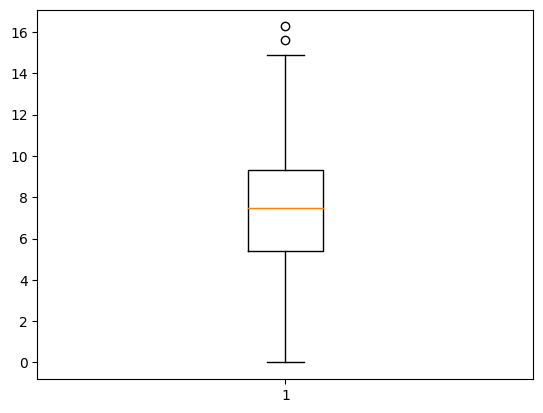

In [132]:
plt.boxplot(comp1['Sales'])

In [133]:
comp1['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [134]:
Sales_IQR = 9.320000 - 5.390000
Sales_Upper_limit = 9.320000 + (1.5* Sales_IQR)
Sales_Upper_limit

15.215000000000002

In [135]:
comp1[comp1['Sales']>Sales_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
316,15.63,122,36,5,369,72,Good,35,10,Yes,Yes
376,16.27,141,60,19,319,92,Good,44,11,Yes,Yes


In [136]:
comp1['Sales'].mean()

7.496325000000001

In [137]:
comp1.loc[comp1['Sales']>Sales_Upper_limit, "Sales"] = comp1['Sales'].mean()

In [138]:
comp1[comp1['Sales']>Sales_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [139]:
comp1.iloc[[316,376]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
316,7.496325,122,36,5,369,72,Good,35,10,Yes,Yes
376,7.496325,141,60,19,319,92,Good,44,11,Yes,Yes


{'whiskers': [<matplotlib.lines.Line2D at 0x7e0b966528c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0b964ec0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0b9654ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0b9651f460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0b9651f160>],
 'means': []}

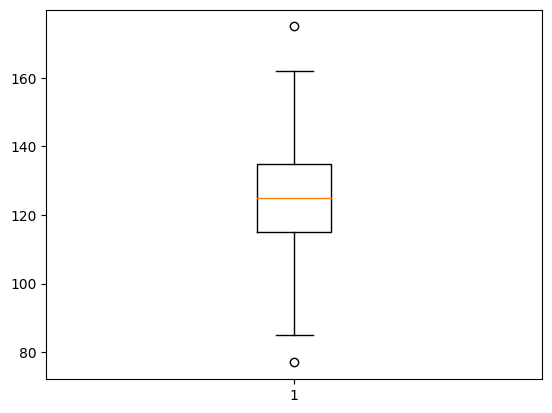

In [140]:
plt.boxplot(comp1['CompPrice'])

In [141]:
comp1['CompPrice'].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

In [142]:
CompPrice_IQR = 135.000000 - 115.000000
CompPrice_Upper_limit = 135.000000 + (1.5* CompPrice_IQR)
CompPrice_Upper_limit

165.0

In [143]:
comp1[comp1['CompPrice']>CompPrice_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
310,9.53,175,65,29,419,166,Medium,53,12,Yes,Yes


In [144]:
comp1['CompPrice'].mean()

124.975

In [145]:
comp1.loc[comp1['CompPrice']>CompPrice_Upper_limit, "CompPrice"] = comp1['CompPrice'].mean()

In [146]:
comp1.iloc[[310]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
310,9.53,124.975,65,29,419,166,Medium,53,12,Yes,Yes


In [147]:
comp1[comp1['CompPrice']>CompPrice_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [148]:
CompPrice_Lower_limit = 115.000000 - (1.5* CompPrice_IQR)
CompPrice_Lower_limit

85.0

In [149]:
comp1[comp1['CompPrice']<CompPrice_Lower_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,77.0,69,0,25,24,Medium,50,18,Yes,No


In [150]:
comp1.loc[comp1['CompPrice']<CompPrice_Lower_limit, "CompPrice"] = comp1['CompPrice'].mean()

In [151]:
comp1.iloc[[42]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,124.849937,69,0,25,24,Medium,50,18,Yes,No


In [152]:
comp1[comp1['CompPrice']<CompPrice_Lower_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


{'whiskers': [<matplotlib.lines.Line2D at 0x7e0b9630ca60>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0b9630d420>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0b9630cf70>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0b9630ebf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0b9630cd00>],
 'means': []}

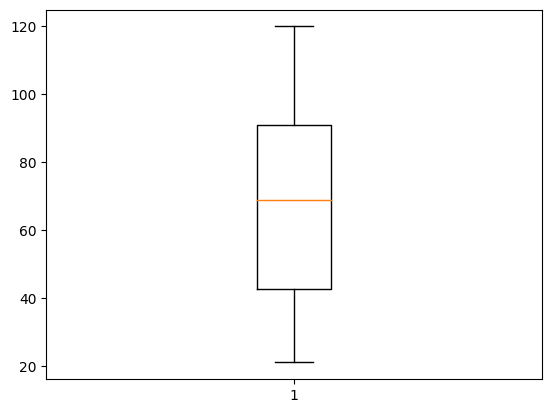

In [153]:
plt.boxplot(comp1['Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0b9605b7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0b9605bd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0b9605b520>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0b96094280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0b96094520>],
 'means': []}

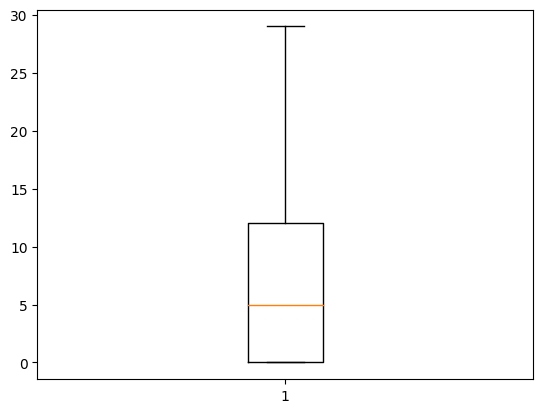

In [154]:
plt.boxplot(comp1['Advertising'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0b95edf010>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0b95edf550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0b95eded70>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0b95edfa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0b95edfd30>],
 'means': []}

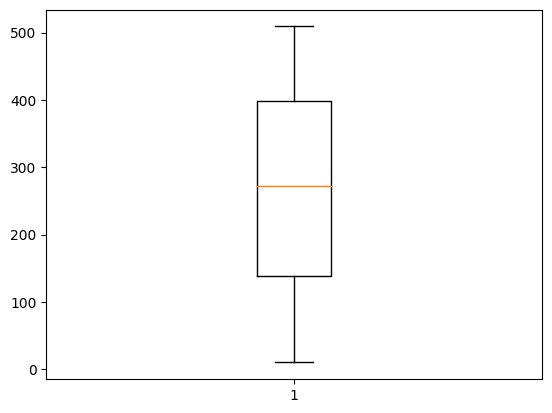

In [155]:
plt.boxplot(comp1['Population'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0b95f59b40>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0b95f5a080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0b95f598a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0b95f5a5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0b95f5a860>],
 'means': []}

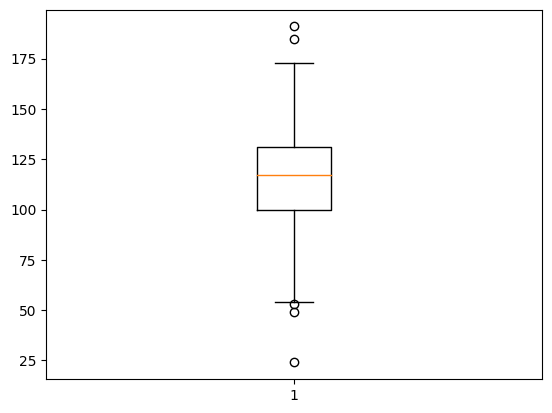

In [156]:
plt.boxplot(comp1['Price'])

In [157]:
comp1['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [158]:
Price_IQR = 131.000000 - 100.000000
Price_Upper_limit = 131.000000 + (1.5* Price_IQR)
Price_Upper_limit

177.5

In [159]:
comp1[comp1['Price']>Price_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
165,0.37,147.0,58,7,100,191,Bad,27,15,Yes,Yes
174,0.00,139.0,24,0,358,185,Medium,79,15,No,No


In [160]:
comp1['Price'].mean()

115.795

In [161]:
comp1.loc[comp1['Price']>Price_Upper_limit, "Price"] = comp1['Price'].mean()

In [162]:
comp1.iloc[[165,174]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
165,0.37,147.0,58,7,100,115.795,Bad,27,15,Yes,Yes
174,0.00,139.0,24,0,358,115.795,Medium,79,15,No,No


In [163]:
Price_Lower_limit = 100.000000 - (1.5* Price_IQR)
Price_Lower_limit

53.5

In [164]:
comp1[comp1['Price']<Price_Lower_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,124.849937,69,0,25,24.0,Medium,50,18,Yes,No
125,9.34,89.000000,78,0,181,49.0,Medium,43,15,No,No
367,14.37,95.000000,106,0,256,53.0,Good,52,17,Yes,No


In [165]:
comp1.loc[comp1['Price']<Price_Lower_limit, "Price"] = comp1['Price'].mean()

In [166]:
comp1.iloc[[42,125,367]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,124.849937,69,0,25,115.433975,Medium,50,18,Yes,No
125,9.34,89.000000,78,0,181,115.433975,Medium,43,15,No,No
367,14.37,95.000000,106,0,256,115.433975,Good,52,17,Yes,No


{'whiskers': [<matplotlib.lines.Line2D at 0x7e0b95de9150>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0b95de9690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0b95de8eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0b95de9bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0b95de9e70>],
 'means': []}

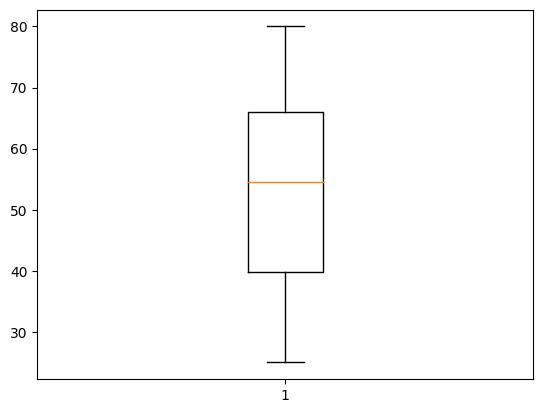

In [167]:
plt.boxplot(comp1['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0b95e3bdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0b95e74370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0b95e3bc70>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0b95e748b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0b95e74b50>],
 'means': []}

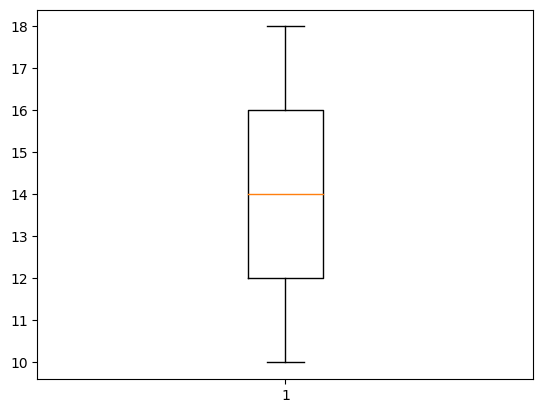

In [168]:
plt.boxplot(comp1['Education'])

In [169]:
comp1['ShelveLoc'] = comp1['ShelveLoc'].astype('category')

In [170]:
comp1['Urban'] = comp1['Urban'].astype('category')

In [171]:
comp1['US'] = comp1['US'].astype('category')

In [172]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    float64 
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    float64 
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(3), int64(5)
memory usage: 26.7 KB


In [173]:
comp1 = comp1.join(pd.get_dummies(comp1[['ShelveLoc','Urban','US']]))
comp1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138.0,73,11,276,120.0,Bad,42,17,Yes,Yes,1,0,0,0,1,0,1
1,11.22,111.0,48,16,260,83.0,Good,65,10,Yes,Yes,0,1,0,0,1,0,1
2,10.06,113.0,35,10,269,80.0,Medium,59,12,Yes,Yes,0,0,1,0,1,0,1
3,7.40,117.0,100,4,466,97.0,Medium,55,14,Yes,Yes,0,0,1,0,1,0,1
4,4.15,141.0,64,3,340,128.0,Bad,38,13,Yes,No,1,0,0,0,1,1,0


In [174]:
comp1 = comp1.drop(['ShelveLoc','Urban','US'], axis =1)

In [175]:
comp1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138.0,73,11,276,120.0,42,17,1,0,0,0,1,0,1
1,11.22,111.0,48,16,260,83.0,65,10,0,1,0,0,1,0,1
2,10.06,113.0,35,10,269,80.0,59,12,0,0,1,0,1,0,1
3,7.40,117.0,100,4,466,97.0,55,14,0,0,1,0,1,0,1
4,4.15,141.0,64,3,340,128.0,38,13,1,0,0,0,1,1,0


# Train-Test Split

In [176]:
X = comp1.iloc[:,1:]
y = comp1.iloc[:,0]

In [177]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138.0,73,11,276,120.0,42,17,1,0,0,0,1,0,1
1,111.0,48,16,260,83.0,65,10,0,1,0,0,1,0,1
2,113.0,35,10,269,80.0,59,12,0,0,1,0,1,0,1
3,117.0,100,4,466,97.0,55,14,0,0,1,0,1,0,1
4,141.0,64,3,340,128.0,38,13,1,0,0,0,1,1,0


In [178]:
y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [180]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 14), (80, 14), (320,), (80,))

# Hyperparameter tuning

In [181]:
maxdepth=[]
for i in range(1,21):
  model0 = DecisionTreeRegressor(max_depth = i, random_state = 42)
  model0.fit(X_train, y_train)
  y_train_predicted0 = model0.predict(X_train)
  maxdepth.append(mean_squared_error(y_train, y_train_predicted0))

In [182]:
maxdepth

[5.824100885149139,
 4.685722231876845,
 3.8052155764179596,
 3.026072168493275,
 2.3281963145084914,
 1.5979295868818402,
 0.845589450875892,
 0.45088394455717895,
 0.2262812793560606,
 0.10899623697916667,
 0.04779218402777777,
 0.019495118303571417,
 0.005989739583333332,
 0.0005233333333333329,
 6.328124999999981e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Elbow Plot

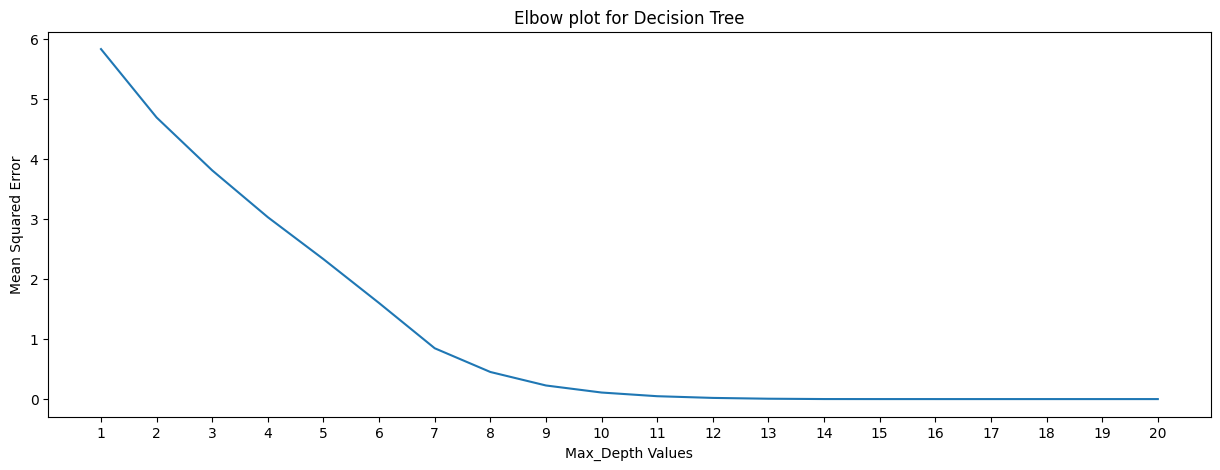

In [183]:
plt.figure(figsize = (15,5))
plt.plot(range(1,21),maxdepth)
plt.title("Elbow plot for Decision Tree")
plt.xlabel('Max_Depth Values')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylabel('Mean Squared Error')
plt.show()

# Model building

In [214]:
model1 = DecisionTreeRegressor(max_depth = 7, criterion = 'squared_error')

In [215]:
model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

# Predictions for training data

In [216]:
y_train_predicted = model1.predict(X_train)

In [217]:
train_MSE = mean_squared_error(y_train, y_train_predicted)
train_MSE

0.845589450875892

In [218]:
train_RMSE = np.sqrt(train_MSE)
train_RMSE

0.9195593786569152

In [219]:
r2_score(y_train, y_train_predicted)

0.8825440735200845

# Predictions for testing data

In [220]:
y_test_predicted = model1.predict(X_test)

In [221]:
test_MSE = mean_squared_error(y_test, y_test_predicted)
test_MSE

5.779693835970223

In [222]:
test_RMSE = np.sqrt(test_MSE)
test_RMSE

2.4040993814670437

In [223]:
r2_score(y_test, y_test_predicted)

0.3590107262216664